In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

weather = pd.read_csv('weatherHistory.csv')
weather.shape

(96453, 12)

In [11]:
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [25]:
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


# Linear Regression

# Cleaning data
- Delete all the rows where humidity is 0

In [28]:
weather = weather[weather['Humidity'] != 0]
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96431.000000,96431.000000,96431.000000,96431.000000,96431.000000,96431.000000,96431.0,96431.000000
mean,11.938495,10.861527,0.735067,10.810924,187.526791,10.348166,0.0,1003.230230
std,9.544608,10.689078,0.195180,6.913451,107.376583,4.191803,0.0,116.982556
min,-21.822222,-27.716667,0.120000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.705556,2.316667,0.600000,5.828200,116.000000,8.347850,0.0,1011.900000
50%,12.005556,12.005556,0.780000,9.965900,180.000000,10.046400,0.0,1016.440000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


# Show trend between temperature and humidity

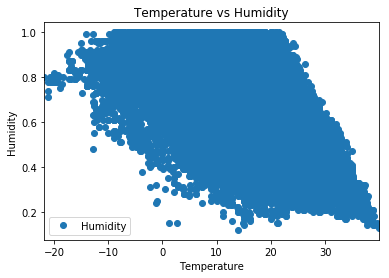

In [29]:
weather.plot(x='Temperature (C)', y='Humidity', style='o')  
plt.title('Temperature vs Humidity')  
plt.xlabel('Temperature')  
plt.ylabel('Humidity')  
plt.show()

# Show average humidity

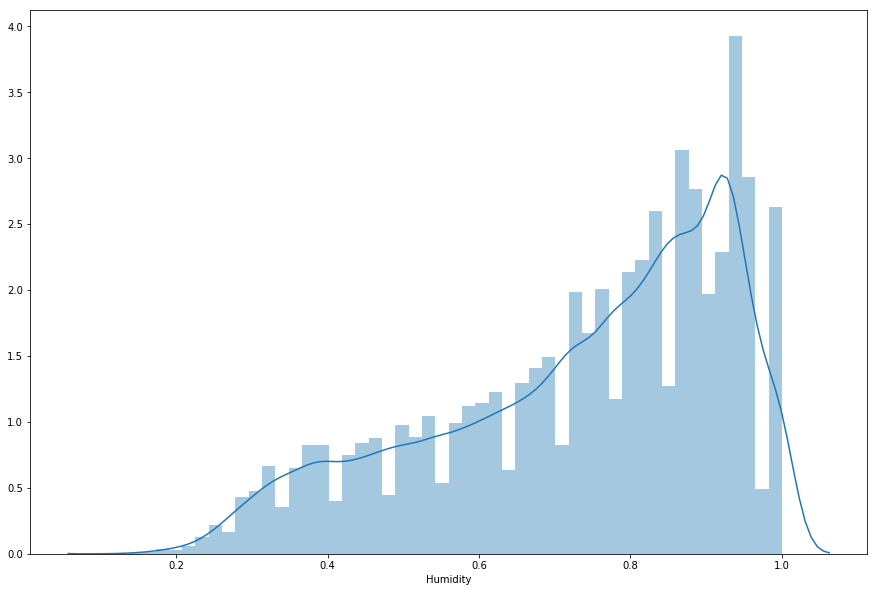

In [30]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(weather['Humidity'])

# Store temperature and humidity into two columns

In [31]:
x = weather['Temperature (C)'].values.reshape(-1,1)
y = weather['Humidity'].values.reshape(-1,1)

# Split into training(80%) and test set(20%) 

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Fitting linear regression

In [33]:
regressor = LinearRegression() 

#training the algorithm
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
#To retrieve the intercept:
print(regressor.intercept_)

[0.8903864]


In [35]:
#For retrieving the slope:
print(regressor.coef_)

[[-0.01303647]]


# What we can see now 
- For every one unit(0.1) of increase in temperature, the humidity will decreases about 0.01

# Start prediction

In [36]:
y_pred = regressor.predict(x_test)

In [38]:
# Ceate a df to compare the actual and predicted
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,0.35,0.628209
1,0.77,0.874815
2,0.31,0.552525
3,0.95,0.885027
4,1.00,0.854174


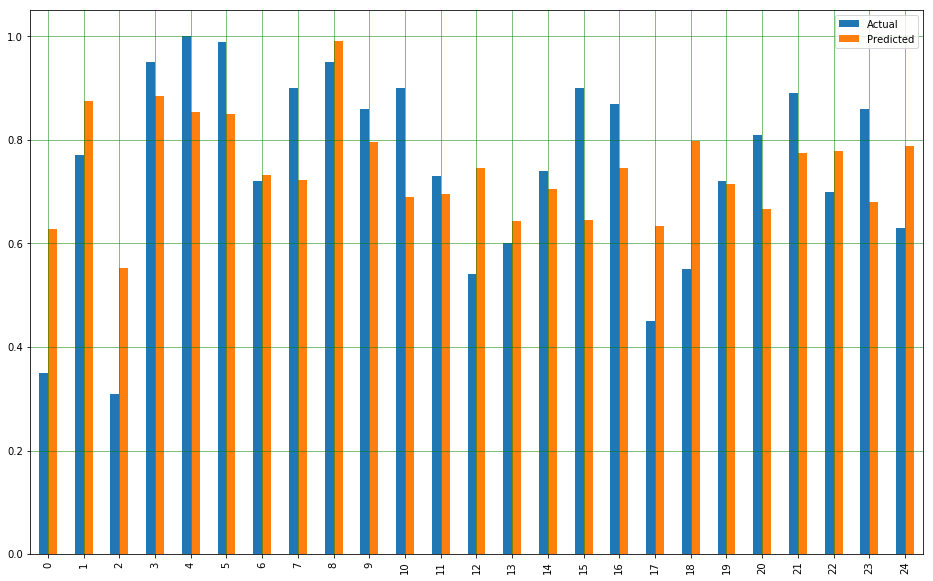

In [39]:
# Show plot
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

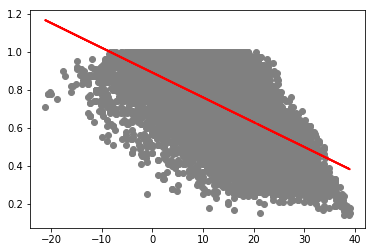

In [40]:
# Scatter plot
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

# Model evaluation

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.12047119738544027
Mean Squared Error: 0.022245270745136207
Root Mean Squared Error: 0.14914848556098786


# Knn

In [118]:
# Temperature (C), Humidity, Wind Speed (km/h)
knn_weather = weather[['Temperature (C)','Humidity','Wind Speed (km/h)','Precip Type']]

# Drop NaN in Precip Type column
knn_weather = knn_weather[knn_weather['Precip Type'].notnull()]

# Create new column to indicate categorical response with number 0 and 1
knn_weather['weather'] = np.where(knn_weather['Precip Type']=='rain', 0, 1)

# Define explanatory variable and our response
knn_y = knn_weather.iloc[:,4].values
knn_x = knn_weather.iloc[:,[0,1,2]].values

In [119]:
knn_weather.head()

,Temperature (C),Humidity,Wind Speed (km/h),Precip Type,weather
0,9.472222,0.89,14.1197,rain,0
1,9.355556,0.86,14.2646,rain,0
2,9.377778,0.89,3.9284,rain,0
3,8.288889,0.83,14.1036,rain,0
4,8.755556,0.83,11.0446,rain,0


In [120]:
knn_weather.describe()

,Temperature (C),Humidity,Wind Speed (km/h),weather
count,95914.000000,95914.000000,95914.000000,95914.000000
mean,11.946825,0.735009,10.805219,0.111464
std,9.563708,0.195430,6.920608,0.314708
min,-21.822222,0.120000,0.000000,0.000000
25%,4.622222,0.600000,5.796000,0.000000
50%,12.036111,0.780000,9.933700,0.000000
75%,18.844444,0.890000,14.135800,0.000000
max,39.905556,1.000000,63.852600,1.000000


# Split data into train and test

In [121]:
knnx_train, knnx_test, knny_train, knny_test = train_test_split(knn_x, knn_y, test_size=0.20) 

# Scaling

In [134]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(knnx_train)

knnx_train = scaler.transform(knnx_train)  
knnx_test = scaler.transform(knnx_test) 

array([[ 1.48336321, -2.01969805,  0.26395997],
       [-1.02315142,  0.69282675,  0.00617789],
       [-0.061518  ,  0.07867019,  0.30576247],
       ...,
       [ 0.09865751,  0.99990503, -1.03423989],
       [-0.08821392,  0.64164704,  0.29647303],
       [ 0.59601409, -1.35436178,  0.75862289]])

# Training and prediction

In [123]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(knnx_train, knny_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [125]:
knny_pred = classifier.predict(knnx_test) 

# Knn evaluation
- The results show that our KNN algorithm was able to classify all the 30 records in the test set with 99% accuracy

In [126]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(knny_test, knny_pred))  
print(classification_report(knny_test, knny_pred)) 

[[16972    96]
 [   70  2045]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     17068
           1       0.96      0.97      0.96      2115

   micro avg       0.99      0.99      0.99     19183
   macro avg       0.98      0.98      0.98     19183
weighted avg       0.99      0.99      0.99     19183



# Chooseing k

In [127]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(knnx_train, knny_train)
    pred_i = knn.predict(knnx_test)
    error.append(np.mean(pred_i != knny_test))

Text(0, 0.5, 'Mean Error')

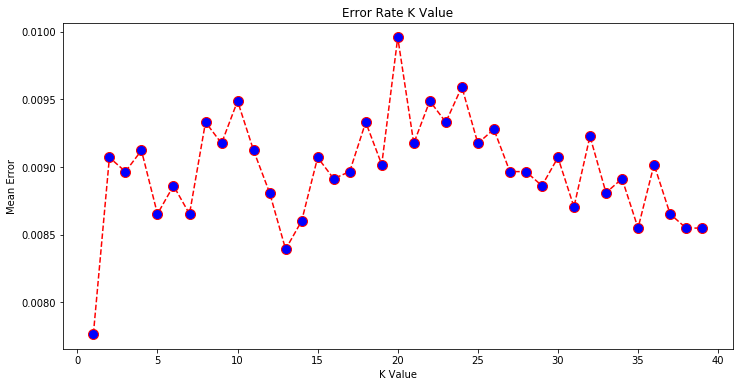

In [128]:
# Plotting
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  